In [1]:
%load_ext autoreload
%load_ext autotime
%autoreload 2

# Online Outcomes: Predicting Success in Virtual Learning

**<font size="4">Author: Jeffrey Hanif Watson</font>**

## Imports and Project Path

In [55]:
# setting project path
import os, sys

gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)


# importing packages
import os, sys
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
# import sqlite3

# setting project path
gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

# from IPython.display import Audio
# sound_file = '/Users/dsbox/Documents/Flatiron/phase_5/WAILERLP.wav'

# from dython.nominal import associations

from src import class_Database_report as dr
from src import helper_functions as f
from src import visualizations as v

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette('GnBu_r')
pd.options.display.max_rows = 300
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time: 3.15 ms


## Creating The Database

In [3]:
# creating database & database class instance
database_name = 'outcomes.db'
db = dr.Database(database_name)

time: 1.19 ms


**Run the cell below once to populate the database. After the database is populated, the cell can be commented out**

In [4]:
# file_name = 'anonymisedData.zip'
# db.populate(file_name, database_name)

time: 532 µs


## Exploring the Data

In [5]:
student_info = db.student_info_df()

time: 215 ms


In [6]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   target                32593 non-null  int64 
 1   row_id                32593 non-null  object
 2   code_module           32593 non-null  object
 3   code_presentation     32593 non-null  object
 4   id_student            32593 non-null  object
 5   gender                32593 non-null  object
 6   region                32593 non-null  object
 7   highest_education     32593 non-null  object
 8   imd_band              31482 non-null  object
 9   age_band              32593 non-null  object
 10  num_of_prev_attempts  32593 non-null  int64 
 11  studied_credits       32593 non-null  int64 
 12  disability            32593 non-null  object
 13  final_result          32593 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.5+ MB
time: 24.1 ms


In [7]:
student_info = db.cleaner_studentinfo(student_info,[])

time: 61.4 ms


In [8]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31144 entries, 1 to 32592
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                31144 non-null  int64   
 1   row_id                31144 non-null  object  
 2   code_module           31144 non-null  object  
 3   code_presentation     31144 non-null  object  
 4   id_student            31144 non-null  object  
 5   gender                31144 non-null  object  
 6   region                31144 non-null  object  
 7   highest_education     31144 non-null  object  
 8   imd_band              31144 non-null  object  
 9   age_band              31144 non-null  object  
 10  num_of_prev_attempts  31144 non-null  int64   
 11  studied_credits       31144 non-null  int64   
 12  disability            31144 non-null  object  
 13  final_result          31144 non-null  object  
 14  course_load           31144 non-null  category
dtypes:

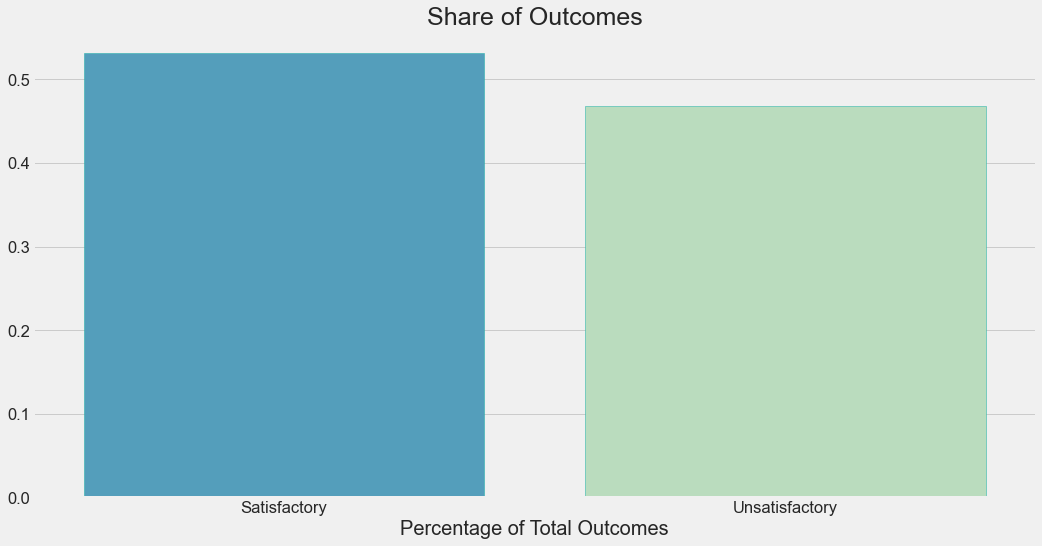

,Outcome,Percentage
0,Satisfactory,0.531724
1,Unsatisfactory,0.468276


time: 119 ms


In [9]:
v.outcomes_target(student_info)

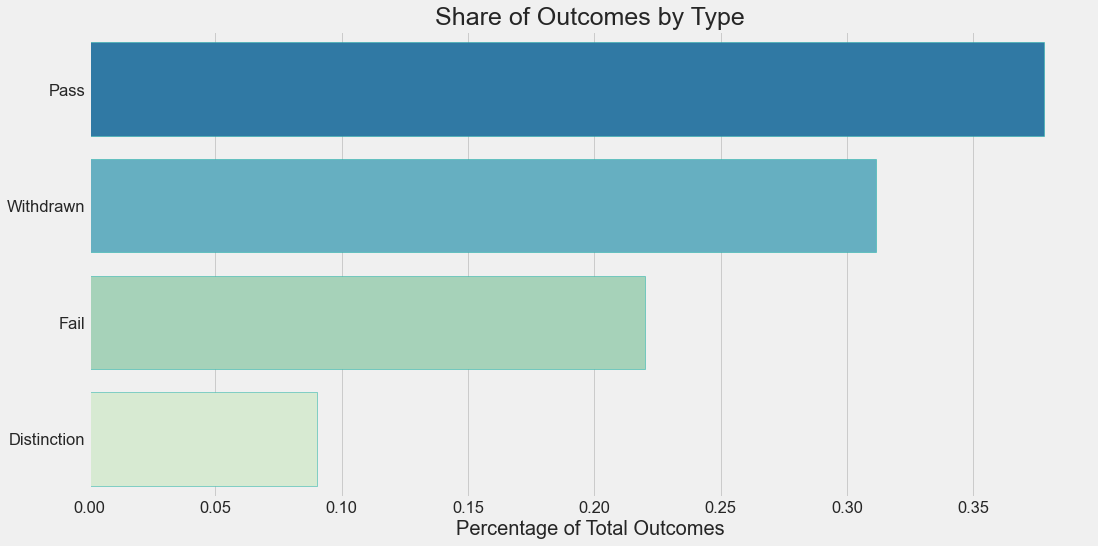

,Outcome,Percentage
0,Pass,0.377922
1,Withdrawn,0.311521
2,Fail,0.220203
3,Distinction,0.090354


time: 138 ms


In [10]:
v.outcomes_type(student_info)

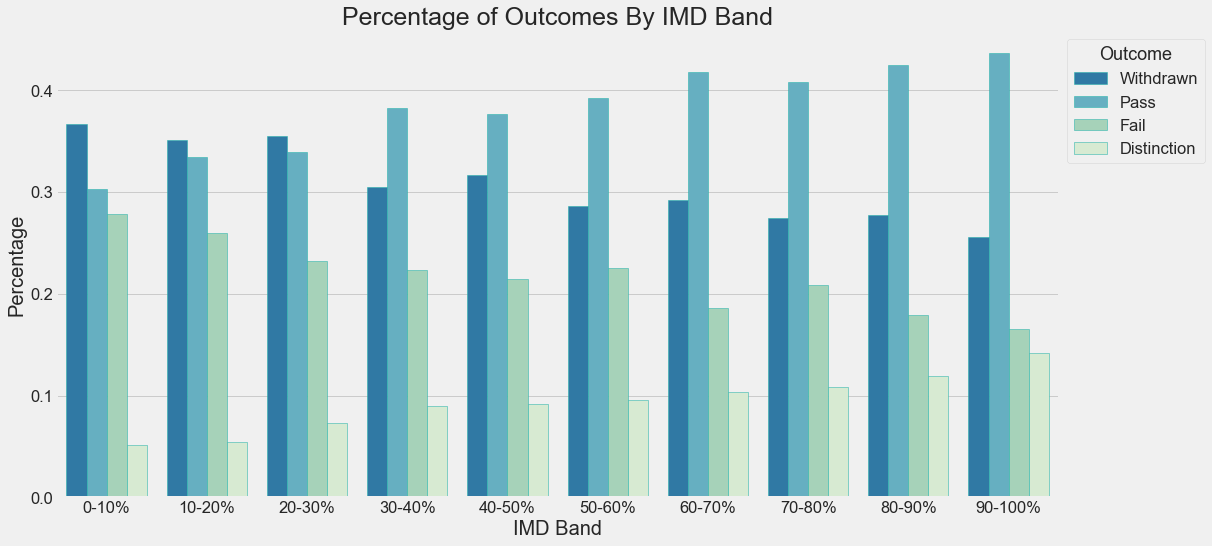

time: 294 ms


In [13]:
v.outcomes_imd(student_info)

## Investigating `IMD Band`

In [59]:
# creating a contingency table
tabs = pd.crosstab(student_info.imd_band, student_info.final_result)

time: 20.3 ms


In [60]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 800 µs


In [61]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
imd_band,,,,
0-10%,168,911,989,1199
10-20%,189,904,1163,1219
20-30%,263,838,1222,1279
30-40%,313,780,1337,1067
40-50%,293,689,1211,1018
50-60%,296,699,1217,887
60-70%,299,535,1204,842
70-80%,312,597,1169,788
80-90%,326,489,1162,760


time: 5.47 ms


In [62]:
# expected values if final_result was independent from course_load
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
imd_band,,,,
0-10%,295.188094,719.402967,1234.670884,1017.738055
10-20%,313.981826,765.205176,1313.278641,1082.534357
20-30%,325.456846,793.170948,1361.274724,1122.097483
30-40%,315.969625,770.049640,1321.592923,1089.387811
40-50%,290.128243,707.071603,1213.507257,1000.292898
50-60%,280.008541,682.408875,1171.180003,965.402582
60-70%,260.220909,634.184434,1088.415104,897.179553
70-80%,258.955947,631.101593,1083.124197,892.818264
80-90%,247.300218,602.695415,1034.372271,852.632096


time: 6.66 ms


In [63]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson

final_result,Distinction,Fail,Pass,Withdrawn
imd_band,,,,
0-10%,-7.402817,7.143362,-6.991624,5.681835
10-20%,-7.053337,5.017465,-4.146855,4.147654
20-30%,-3.462050,1.591755,-3.774848,4.683976
30-40%,-0.167062,0.358575,0.423810,-0.678298
40-50%,0.168598,-0.679618,-0.071974,0.559866
50-60%,0.955658,0.635117,1.338885,-2.523342
60-70%,2.403956,-3.938544,3.503514,-1.842207
70-80%,3.296277,-1.357454,2.609346,-3.507966
80-90%,5.004507,-4.631205,3.968319,-3.172347


time: 13.6 ms


From the contingency tables it appears that, in general, Distinction and Pass vary directly with IMD band. The higher the student's IMD band, the more likely the student is to pass or pass with distinction. Conversely, Withdrawn and Fail vary inversely with IMD band. In general, the lower the student's IMD band the more likely the student is to fail or withdraw.

## Chi-Square Test for `imd_band`
Ho = `imd_band` and `final_result` are independent.

Ha = `imd_band` and `final_result` are not independent.

alpha = .05

In [64]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 653.0806826983792
p value= 2.473461324525511e-120
degrees of freedom = 27
time: 1.38 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `imd_band` and `final_result` are not independent.

In [65]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

Cramer's V Degrees of Freedom=3

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

final_result
Distinction    0.278138
Fail           0.178166
Pass           0.135999
Withdrawn      0.149793
dtype: float64
time: 6.36 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `imd_band` has a small, but statistically significant, effect on Pass and Withdrawn and a medium effect on Fail and Distinction.

## Disability Status

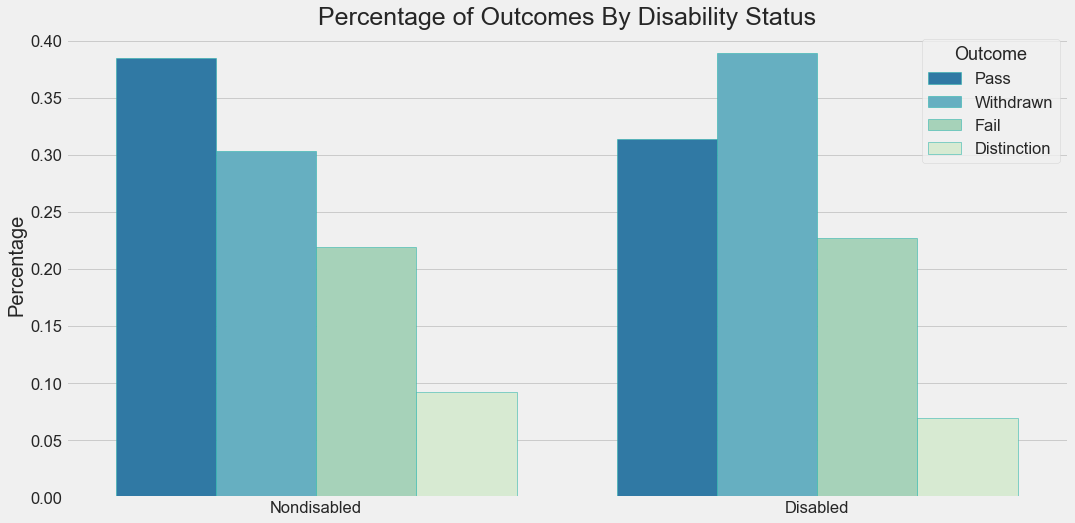

,Disability,Outcome,Percentage
0,No,Pass,0.384920
1,No,Withdrawn,0.303035
2,No,Fail,0.219404
3,No,Distinction,0.092641
4,Yes,Withdrawn,0.389179
5,Yes,Pass,0.313885
6,Yes,Fail,0.227510
7,Yes,Distinction,0.069426


time: 164 ms


In [66]:
v.outcomes_dis(student_info)

## Investigating `Disability`

In [67]:
# creating a contingency table
tabs = pd.crosstab(student_info.disability, student_info.final_result)

time: 17.1 ms


In [68]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 738 µs


In [69]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
No,2601,6160,10807,8508
Yes,213,698,963,1194


time: 4.64 ms


In [70]:
# expected values if final_result was independent from course_load
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
No,2536.792448,6182.417416,10610.535577,8746.254559
Yes,277.207552,675.582584,1159.464423,955.745441


time: 6.71 ms


In [71]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson

final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
No,1.274805,-0.285106,1.907284,-2.547594
Yes,-3.856413,0.862475,-5.769726,7.706729


time: 5.85 ms


From the contingency tables it appears that a disability status contributes negatively to Distinction, Pass, while it contributes positively to Withdrawn and Fail. Conversely,  nondisability status contributes positivly to Distinction and Pass,  while it contributes negatively to Fail  and Withdrawn.

## Chi-Square Test for `disability`
Ho = `disability` and `final_result` are independent.

Ha = `disability` and `final_result` are not independent.

alpha = .05

In [72]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 120.13357979289296
p value= 7.222172836526508e-26
degrees of freedom = 3
time: 1.62 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `disability` and `final_result` are not independent.

In [73]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

Cramer's V Degrees of Freedom=1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

final_result
Distinction    0.206619
Fail           0.132353
Pass           0.101029
Withdrawn      0.111276
dtype: float64
time: 5.86 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `disability` has a small, but statistically significant, effect on all of the outcomes.